# Exploratory Data Analysis

The dataset includes the following columns:

- PassengerId: Unique identifier for each passenger.

- Survived: Survival status of the passenger (0 = Not Survived, 1 = Survived).

- Pclass: Passenger class (1 = First class, 2 = Second class, 3 = Third class).

- Sex: Gender of the passenger.

- Age: Age of the passenger.

- SibSp: Number of siblings/spouses aboard the Titanic.

- Parch: Number of parents/children aboard the Titanic.

- Fare: Fare paid by the passenger.

- Embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading and Splitting the dataset

In [2]:
titanic_dataset = pd.read_csv("datasets/titanic_dataset.csv", index_col=0)
target = titanic_dataset['Survived']
titanic_dataset.drop("Survived", axis=1, inplace=True)
titanic_dataset['Survived'] = target
titanic_dataset.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
PassengerId,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [3]:
# split datasets
titanic_dataset = titanic_dataset.sample(frac=1, random_state=42)
titanic_dataset.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
PassengerId,,,,,,,,,,,
710,3,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,1,1,2661,15.2458,NaN,C,1
440,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.0,0,0,C.A. 18723,10.5000,NaN,S,0
841,3,"Alhomaki, Mr. Ilmari Rudolf",male,20.0,0,0,SOTON/O2 3101287,7.9250,NaN,S,0
721,2,"Harper, Miss. Annie Jessie ""Nina""",female,6.0,0,1,248727,33.0000,NaN,S,1
40,3,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,2651,11.2417,NaN,C,1


In [4]:
size = len(titanic_dataset)
train_data, test_data = titanic_dataset[:int(size*0.8)], titanic_dataset[int(size*0.8):]

print("Train data:", train_data.shape)
print("Test data:", test_data.shape)

Train data: (712, 11)
Test data: (179, 11)


In [5]:
# train_data.to_csv("train.csv")
# test_data.to_csv("test.csv")

## Exploring train dataset

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 710 to 804
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    712 non-null    int64  
 1   Name      712 non-null    object 
 2   Sex       712 non-null    object 
 3   Age       568 non-null    float64
 4   SibSp     712 non-null    int64  
 5   Parch     712 non-null    int64  
 6   Ticket    712 non-null    object 
 7   Fare      712 non-null    float64
 8   Cabin     158 non-null    object 
 9   Embarked  710 non-null    object 
 10  Survived  712 non-null    int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 66.8+ KB


In [7]:
train_data.isnull().sum()

Pclass        0
Name          0
Sex           0
Age         144
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       554
Embarked      2
Survived      0
dtype: int64

#### Relation between Gender and Survived

In [8]:
# Check the survival percentage
train_data['Survived'].value_counts() / len(train_data)

Survived
0    0.610955
1    0.389045
Name: count, dtype: float64

The survival is around 39% in this dataset

In [9]:
# Check male and female survivals
survived_victims = train_data[train_data['Survived'] == 1]
survived_victims_by_sex = survived_victims['Survived'].groupby(survived_victims['Sex']).count() 
survived_victims_by_sex / len(survived_victims)

Sex
female    0.67509
male      0.32491
Name: Survived, dtype: float64

This shows that around 67% females survived and 32% males survived from this incident.

In [10]:
deceased_victims = train_data[train_data['Survived'] == 0]
deceased_victims_by_sex = deceased_victims['Survived'].groupby(deceased_victims['Sex']).count()
deceased_victims_by_sex / len(deceased_victims)

Sex
female    0.151724
male      0.848276
Name: Survived, dtype: float64

Around 85% of males and 15% females died in this incident.

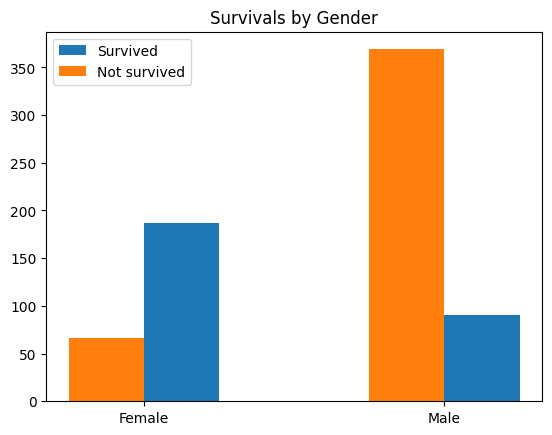

In [11]:
plt.bar(x=["Female", "Male"], height=survived_victims_by_sex, width=0.25, align='edge', label="Survived")
plt.bar(x=["Female", "Male"], height=deceased_victims_by_sex, width=-0.25, align='edge', label="Not survived")

plt.title("Survivals by Gender")
plt.legend()
plt.show()

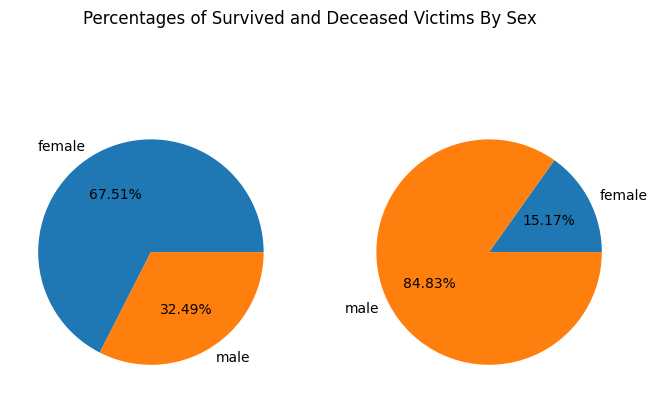

In [12]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8, 5))

ax1.pie(survived_victims_by_sex, labels=survived_victims_by_sex.index, autopct="%.2f%%")
ax2.pie(deceased_victims_by_sex, labels=deceased_victims_by_sex.index, autopct="%.2f%%")

fig.suptitle("Percentages of Survived and Deceased Victims By Sex")
plt.show()

Most of the `females survived` wherease on the other hand, `males died` the most.

#### Relation between Age and Survived

In [13]:
train_data['Age'].describe()

count    568.000000
mean      29.538151
std       14.947113
min        0.420000
25%       20.375000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

Text(0.5, 1.0, 'Distribution of Age')

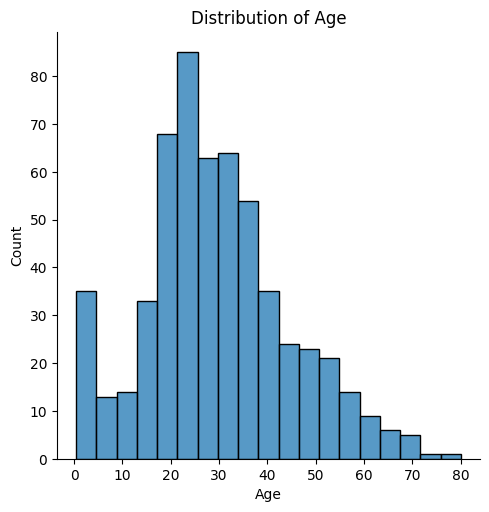

In [14]:
sns.displot(data=train_data, x='Age')
plt.title("Distribution of Age")

In [15]:
train_data['Age'].describe()

count    568.000000
mean      29.538151
std       14.947113
min        0.420000
25%       20.375000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [16]:
# Fill the missing values in Age column with mean
mean_age = train_data['Age'].mean()
train_data['Age'] = train_data['Age'].fillna(mean_age)

train_data.head(10)

/tmp/ipykernel_33687/3989552355.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Age'] = train_data['Age'].fillna(mean_age)


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
PassengerId,,,,,,,,,,,
710,3,"Moubarek, Master. Halim Gonios (""William George"")",male,29.538151,1,1,2661,15.2458,NaN,C,1
440,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.000000,0,0,C.A. 18723,10.5000,NaN,S,0
841,3,"Alhomaki, Mr. Ilmari Rudolf",male,20.000000,0,0,SOTON/O2 3101287,7.9250,NaN,S,0
721,2,"Harper, Miss. Annie Jessie ""Nina""",female,6.000000,0,1,248727,33.0000,NaN,S,1
40,3,"Nicola-Yarred, Miss. Jamila",female,14.000000,1,0,2651,11.2417,NaN,C,1
291,1,"Barber, Miss. Ellen ""Nellie""",female,26.000000,0,0,19877,78.8500,NaN,S,1
301,3,"Kelly, Miss. Anna Katherine ""Annie Kate""",female,29.538151,0,0,9234,7.7500,NaN,Q,1
334,3,"Vander Planke, Mr. Leo Edmondus",male,16.000000,2,0,345764,18.0000,NaN,S,0
209,3,"Carr, Miss. Helen ""Ellen""",female,16.000000,0,0,367231,7.7500,NaN,Q,1


In [17]:
categorized_ages = pd.cut(x=train_data['Age'], bins=[0, 30, 50, 90], labels=['young', 'middle', 'old'])
categorized_ages

PassengerId
710     young
440    middle
841     young
721     young
40      young
        ...  
506     young
640     young
879     young
825     young
804     young
Name: Age, Length: 712, dtype: category
Categories (3, object): ['young' < 'middle' < 'old']

In [18]:
train_data['Age'] = categorized_ages
train_data

/tmp/ipykernel_33687/1482745203.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Age'] = categorized_ages


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
PassengerId,,,,,,,,,,,
710,3,"Moubarek, Master. Halim Gonios (""William George"")",male,young,1,1,2661,15.2458,NaN,C,1
440,2,"Kvillner, Mr. Johan Henrik Johannesson",male,middle,0,0,C.A. 18723,10.5000,NaN,S,0
841,3,"Alhomaki, Mr. Ilmari Rudolf",male,young,0,0,SOTON/O2 3101287,7.9250,NaN,S,0
721,2,"Harper, Miss. Annie Jessie ""Nina""",female,young,0,1,248727,33.0000,NaN,S,1
40,3,"Nicola-Yarred, Miss. Jamila",female,young,1,0,2651,11.2417,NaN,C,1
...,...,...,...,...,...,...,...,...,...,...,...
506,1,"Penasco y Castellana, Mr. Victor de Satode",male,young,1,0,PC 17758,108.9000,C65,C,0
640,3,"Thorneycroft, Mr. Percival",male,young,1,0,376564,16.1000,NaN,S,0
879,3,"Laleff, Mr. Kristo",male,young,0,0,349217,7.8958,NaN,S,0


In [19]:
# Let's see the age of survivors
survived_victims = train_data[train_data['Survived'] == 1]
survived_victims_by_age = survived_victims['Survived'].groupby(survived_victims['Age'], observed=False).count()
survived_victims_by_age

Age
young     180
middle     77
old        20
Name: Survived, dtype: int64

In [20]:
deceased_victims = train_data[train_data['Survived'] == 0]
deceased_victims_by_age = deceased_victims['Survived'].groupby(deceased_victims['Age'], observed=False).count()
deceased_victims_by_age

Age
young     295
middle    103
old        37
Name: Survived, dtype: int64

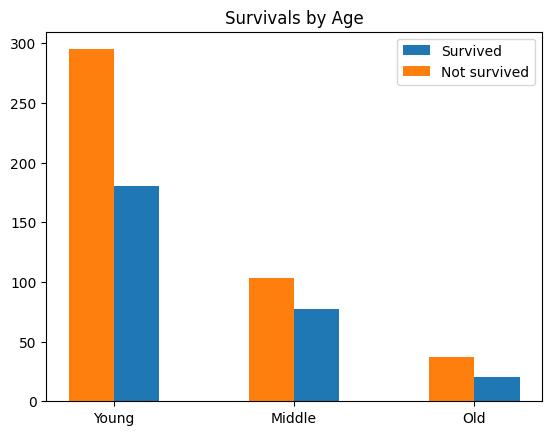

In [21]:
plt.bar(x=["Young", "Middle", "Old"], height=survived_victims_by_age, width=0.25, align='edge', label="Survived")
plt.bar(x=["Young", "Middle", "Old"], height=deceased_victims_by_age, width=-0.25, align='edge', label="Not survived")

plt.title("Survivals by Age")
plt.legend()
plt.show()

Most of the victims wre young aged people

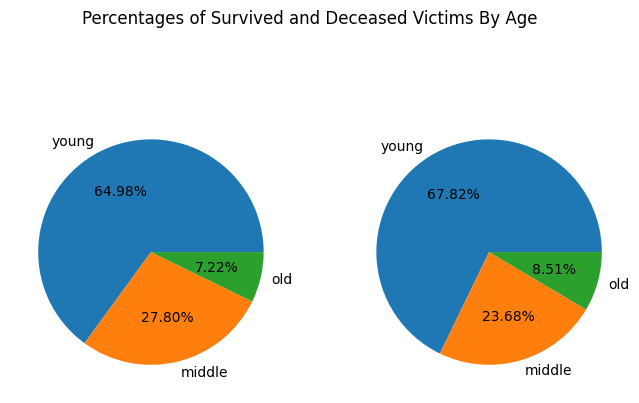

In [22]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8, 5))

ax1.pie(survived_victims_by_age, labels=survived_victims_by_age.index, autopct="%.2f%%")
ax2.pie(deceased_victims_by_age, labels=deceased_victims_by_age.index, autopct="%.2f%%")

fig.suptitle("Percentages of Survived and Deceased Victims By Age")
plt.show()

In the graph, the middle aged people suffered the most in this tragedy.

In [23]:
train_data

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
PassengerId,,,,,,,,,,,
710,3,"Moubarek, Master. Halim Gonios (""William George"")",male,young,1,1,2661,15.2458,NaN,C,1
440,2,"Kvillner, Mr. Johan Henrik Johannesson",male,middle,0,0,C.A. 18723,10.5000,NaN,S,0
841,3,"Alhomaki, Mr. Ilmari Rudolf",male,young,0,0,SOTON/O2 3101287,7.9250,NaN,S,0
721,2,"Harper, Miss. Annie Jessie ""Nina""",female,young,0,1,248727,33.0000,NaN,S,1
40,3,"Nicola-Yarred, Miss. Jamila",female,young,1,0,2651,11.2417,NaN,C,1
...,...,...,...,...,...,...,...,...,...,...,...
506,1,"Penasco y Castellana, Mr. Victor de Satode",male,young,1,0,PC 17758,108.9000,C65,C,0
640,3,"Thorneycroft, Mr. Percival",male,young,1,0,376564,16.1000,NaN,S,0
879,3,"Laleff, Mr. Kristo",male,young,0,0,349217,7.8958,NaN,S,0


#### Relation between Fare and Survived

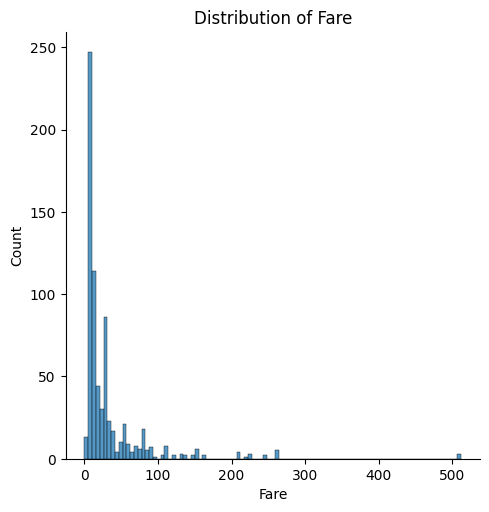

In [24]:
sns.displot(data=train_data, x='Fare')
plt.title("Distribution of Fare")
plt.show()

As we can see this distribution is highly skewed towards left and almost follows power law distribution

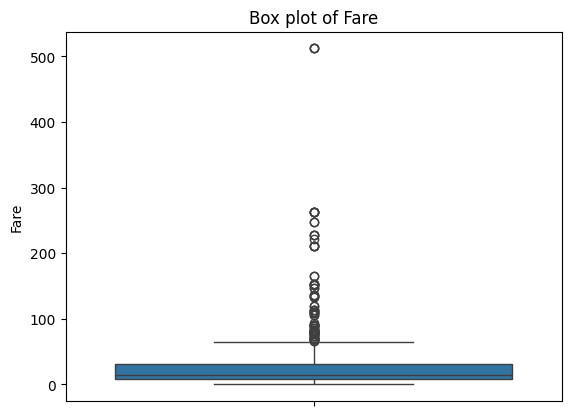

In [25]:
# Checking outliers
sns.boxplot(data=train_data, y='Fare')
plt.title("Box plot of Fare")
plt.show()

In [26]:
# Let's try to categorize the fares
categorized_fares = pd.cut(x=train_data['Fare'], bins=[-0.5, 150, 300, 600], labels=['low', 'mid', 'high'])
categorized_fares

PassengerId
710    low
440    low
841    low
721    low
40     low
      ... 
506    low
640    low
879    low
825    low
804    low
Name: Fare, Length: 712, dtype: category
Categories (3, object): ['low' < 'mid' < 'high']

In [27]:
train_data['Fare'] = categorized_fares
train_data

/tmp/ipykernel_33687/666681828.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Fare'] = categorized_fares


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
PassengerId,,,,,,,,,,,
710,3,"Moubarek, Master. Halim Gonios (""William George"")",male,young,1,1,2661,low,NaN,C,1
440,2,"Kvillner, Mr. Johan Henrik Johannesson",male,middle,0,0,C.A. 18723,low,NaN,S,0
841,3,"Alhomaki, Mr. Ilmari Rudolf",male,young,0,0,SOTON/O2 3101287,low,NaN,S,0
721,2,"Harper, Miss. Annie Jessie ""Nina""",female,young,0,1,248727,low,NaN,S,1
40,3,"Nicola-Yarred, Miss. Jamila",female,young,1,0,2651,low,NaN,C,1
...,...,...,...,...,...,...,...,...,...,...,...
506,1,"Penasco y Castellana, Mr. Victor de Satode",male,young,1,0,PC 17758,low,C65,C,0
640,3,"Thorneycroft, Mr. Percival",male,young,1,0,376564,low,NaN,S,0
879,3,"Laleff, Mr. Kristo",male,young,0,0,349217,low,NaN,S,0


In [28]:
survived_victims = train_data[train_data['Survived'] == 1]
survived_victims_by_fare = survived_victims['Survived'].groupby(survived_victims['Fare'], observed=False).count()
survived_victims_by_fare

Fare
low     258
mid      16
high      3
Name: Survived, dtype: int64

In [29]:
deceased_victims = train_data[train_data['Survived'] == 0]
deceased_victims_by_fare = deceased_victims['Survived'].groupby(deceased_victims['Fare'], observed=False).count()
deceased_victims_by_fare

Fare
low     428
mid       7
high      0
Name: Survived, dtype: int64

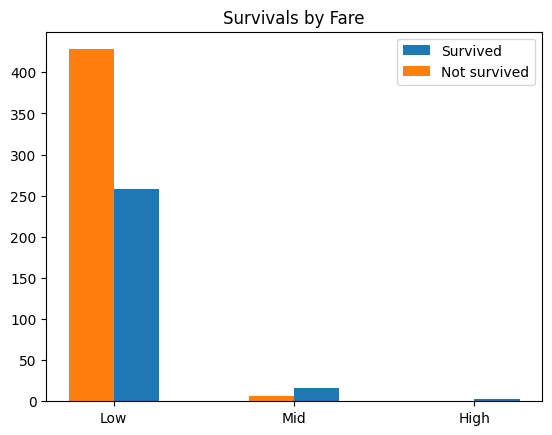

In [30]:
plt.bar(x=["Low", "Mid", "High"], height=survived_victims_by_fare, width=0.25, align='edge', label="Survived")
plt.bar(x=["Low", "Mid", "High"], height=deceased_victims_by_fare, width=-0.25, align='edge', label="Not survived")

plt.title("Survivals by Fare")
plt.legend()
plt.show()

It is evident that people who paid **low fare** are the ones who had the most impact in this incident.

#### Relation between Embarked and Survived

In [31]:
train_data['Embarked'].value_counts()

Embarked
S    509
C    139
Q     62
Name: count, dtype: int64

Most of them were going to Southampton

In [32]:
# Fill the missing values with 'S'
mode_embarked = train_data['Embarked'].mode()
train_data['Embarked'] = train_data['Embarked'].fillna(mode_embarked[0])
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 710 to 804
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Pclass    712 non-null    int64   
 1   Name      712 non-null    object  
 2   Sex       712 non-null    object  
 3   Age       712 non-null    category
 4   SibSp     712 non-null    int64   
 5   Parch     712 non-null    int64   
 6   Ticket    712 non-null    object  
 7   Fare      712 non-null    category
 8   Cabin     158 non-null    object  
 9   Embarked  712 non-null    object  
 10  Survived  712 non-null    int64   
dtypes: category(2), int64(4), object(5)
memory usage: 73.4+ KB


/tmp/ipykernel_33687/960774881.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Embarked'] = train_data['Embarked'].fillna(mode_embarked[0])


In [33]:
survived_victims = train_data[train_data['Survived'] == 1]
survived_victims_by_embarked = survived_victims['Survived'].groupby(survived_victims['Embarked'], observed=False).count()
survived_victims_by_embarked

Embarked
C     78
Q     21
S    178
Name: Survived, dtype: int64

In [34]:
deceased_victims = train_data[train_data['Survived'] == 0]
deceased_victims_by_embarked = deceased_victims['Survived'].groupby(deceased_victims['Embarked'], observed=False).count()
deceased_victims_by_embarked

Embarked
C     61
Q     41
S    333
Name: Survived, dtype: int64

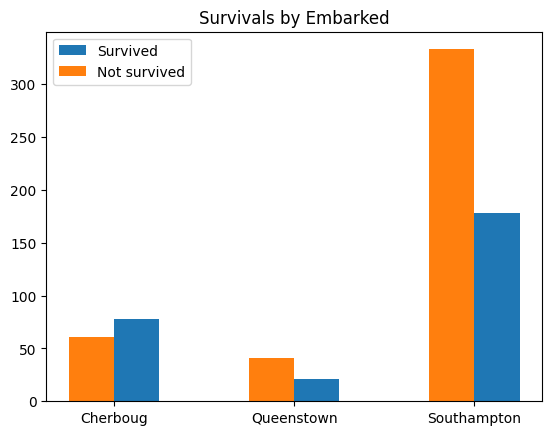

In [35]:
plt.bar(x=["Cherboug", "Queenstown", "Southampton"], height=survived_victims_by_embarked, width=0.25, align='edge', label="Survived")
plt.bar(x=["Cherboug", "Queenstown", "Southampton"], height=deceased_victims_by_embarked, width=-0.25, align='edge', label="Not survived")

plt.title("Survivals by Embarked")
plt.legend()
plt.show()

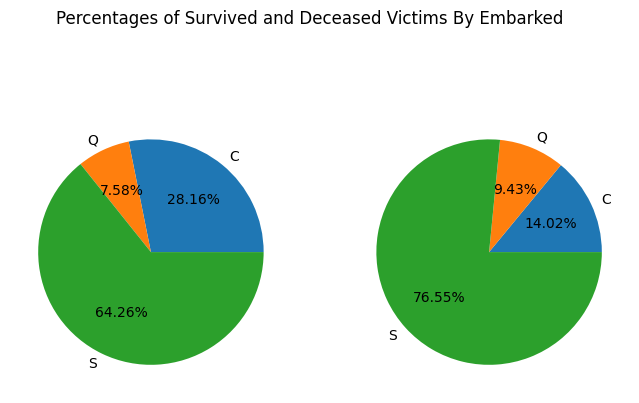

In [36]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8, 5))

ax1.pie(survived_victims_by_embarked, labels=survived_victims_by_embarked.index, autopct="%.2f%%")
ax2.pie(deceased_victims_by_embarked, labels=deceased_victims_by_embarked.index, autopct="%.2f%%")

fig.suptitle("Percentages of Survived and Deceased Victims By Embarked")
plt.show()

Passengers going to Southampton suffered the most.

#### Dropping irrelevant columns

In [37]:
# Dropping Name and Ticket columns as they are irrelevant for analysis
train_data = train_data.drop(columns=['Name', 'Ticket', 'Cabin'], axis=1)
train_data

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
PassengerId,,,,,,,,
710,3,male,young,1,1,low,C,1
440,2,male,middle,0,0,low,S,0
841,3,male,young,0,0,low,S,0
721,2,female,young,0,1,low,S,1
40,3,female,young,1,0,low,C,1
...,...,...,...,...,...,...,...,...
506,1,male,young,1,0,low,C,0
640,3,male,young,1,0,low,S,0
879,3,male,young,0,0,low,S,0


In [38]:
# Saving the cleaned dataset
train_data.to_csv("./datasets/train_cleaned.csv")

## Data Insights

Summary:

- Most of Passengers aboarded were **young** audience.

- Most of them were embarking to **Southampton**.

- **Females survived** while **males suffered** the most from this incident.

- A large proportion of passengers had given **low fare** for this journey.